In [1]:
!pip install category_encoders==2.*
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# Encoders
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

# Pipeline
from sklearn.pipeline import make_pipeline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve

     |████████████████████████████████| 80 kB 3.7 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Creating a wrangle function for the data set
def wrangle(tv_path):
  df = pd.read_csv(tv_path)
  category_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education']
  df[category_columns] = df[category_columns].astype('category')
  #Dropped Zip Codes as this was not an important column
  df.drop(columns='ZIP Code', inplace=True)
  #dropped ID as this is no use to our data set
  df.drop(columns='ID', axis='columns', inplace=True)
  return df

df = wrangle('Bank_Personal_Loan_Modelling.csv')

In [5]:
df = wrangle('Bank_Personal_Loan_Modelling.csv')

In [157]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
#ID, Customer ID
#Age, Customers AGE
#Experience, Years of work experience
#Income, A Customers Income yearly in thousands
#Zip Code, Home Adress Zip Code
#Family, Family size
#CCavg, Monthly credit card spending
#Education, Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
#Mortgage, Mortgage on house
#Personal Loan, Customer accepting a loan, 1 meaning yes, 0 meaning no
#Securities account, does a customer have a bank security account
#CD account, does the customer have a deposit account
#Online, does the customer bank via online
#Credit Card, does the cistomer use a credit card 

# **Importing zipcodes library**

In [6]:
#insall US zipcode library
#!pip install uszipcode
#from uszipcode import SearchEngine
#search = SearchEngine(simple_zipcode=True) 

# **Understanding our data**

In [104]:
df.shape

(5000, 14)

In [156]:
df.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [11]:
#checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0


# **Changing Zipcodes to counties with library**

In [98]:
#Adding a column of counties, using the lamda function for all values in zipcodes, search zipcoes in library and apply it by city 
#df['City'] = df['ZIP Code'].apply(lambda x:search.by_zipcode(x).city)

In [197]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [196]:
#df[df['City'].isnull()]['ZIP Code'].unique()

KeyError: ignored

# **Choosing subests in the data set**

## **45 and below mean salary**

In [91]:
age_45 = df[df['Age']<45]
age_45

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4989,24,0,38,1,1.0,3,0,0,0,0,1,0
4992,30,5,13,4,0.5,3,0,0,0,0,0,0
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0


In [92]:
print('The mean income for ages below 45 is:',age_45['Income'].mean())

The mean income for ages below 45 is: 76.19105351170569


# 45 and above mean salary

In [7]:
age_above_45 = df[df['Age']>45]
age_above_45

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
6,7,53,27,72,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,1,0.3,3,0,0,0,0,0,1
10,11,65,39,105,4,2.4,3,0,0,0,0,0,0
12,13,48,23,114,2,3.8,3,0,0,1,0,0,0
13,14,59,32,40,4,2.5,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,4991,55,25,58,4,2.0,3,219,0,0,0,0,1
4991,4992,51,25,92,1,1.9,2,100,0,0,0,0,1
4994,4995,64,40,75,3,2.0,3,0,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0


In [8]:
print('The mean income for ages above 45 is:',age_above_45['Income'].mean())

The mean income for ages above 45 is: 71.06811769447803


# **Family of one mean salary**

In [9]:
family1 = df.loc[df['Family']==1]
family1

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
7,8,50,24,22,1,0.3,3,0,0,0,0,0,1
9,10,34,9,180,1,8.9,3,0,1,0,0,0,0
14,15,67,41,112,1,2.0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,4987,32,6,78,1,2.9,3,0,0,0,0,0,0
4988,4989,34,8,85,1,2.5,1,136,0,0,0,0,1
4989,4990,24,0,38,1,1.0,3,0,0,0,0,1,0
4991,4992,51,25,92,1,1.9,2,100,0,0,0,0,1


In [10]:
print('The mean income for family of one is:',family1['Income'].mean())

The mean income for family of one is: 78.62228260869566


In [11]:
print("Mean age:",family1['Age'].mean())

Mean age: 45.75815217391305


# **Family of two mean salary**

In [12]:
family2 = df.loc[df['Family']==2]
family2

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
6,7,53,27,72,2,1.50,2,0,0,0,0,1,0
12,13,48,23,114,2,3.80,3,0,0,1,0,0,0
18,19,46,21,193,2,8.10,3,0,1,0,0,0,0
23,24,44,18,43,2,0.70,1,163,0,1,0,0,0
24,25,36,11,152,2,3.90,1,159,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,4970,45,19,60,2,0.40,3,250,0,0,0,1,0
4970,4971,37,13,95,2,1.70,2,0,0,0,0,0,1
4981,4982,34,9,195,2,3.00,1,122,0,0,0,1,0
4993,4994,45,21,218,2,6.67,1,0,0,0,0,1,0


In [13]:
print('The mean income for family of two is:',family2['Income'].mean())

The mean income for family of two is: 84.2391975308642


In [14]:
print("Mean age:",family2['Age'].mean())

Mean age: 45.4945987654321


# **Family of three mean salary**

In [15]:
family3 = df.loc[df['Family']==3]
family3

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
8,9,35,10,81,3,0.6,2,104,0,0,0,1,0
11,12,29,5,45,3,0.1,2,0,0,0,0,1,0
21,22,57,27,63,3,2.0,3,0,0,0,0,1,0
25,26,43,19,29,3,0.5,1,97,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4986,48,23,30,3,1.7,2,162,0,0,0,1,0
4987,4988,48,23,43,3,1.7,2,159,0,0,0,1,0
4994,4995,64,40,75,3,2.0,3,0,0,0,0,1,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


In [16]:
print('The mean income for family of three is:',family3['Income'].mean())

The mean income for family of three is: 66.9049504950495


In [17]:
print("Mean age:",family3['Age'].mean())

Mean age: 46.124752475247526


# **Family of four mean salary**

In [18]:
family4 = df.loc[df['Family']==4]
family4

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,4,0.4,2,155,0,0,0,1,0
10,11,65,39,105,4,2.4,3,0,0,0,0,0,0
13,14,59,32,40,4,2.5,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,4983,36,10,45,4,0.2,1,0,0,0,0,0,1
4984,4985,27,1,98,4,2.3,3,0,0,0,0,0,1
4990,4991,55,25,58,4,2.0,3,219,0,0,0,0,1
4992,4993,30,5,13,4,0.5,3,0,0,0,0,0,0


In [19]:
print('The mean income for family of four is:',family4['Income'].mean())

The mean income for family of four is: 62.51309328968903


In [20]:
print("Mean age:",family4['Age'].mean())

Mean age: 44.01718494271686


# **Split Data**

Creating a model

In [4]:
# Create a clone of data set
df_loan = df.copy()
#These are outlier columns that have no place with the model going to be made
df_loan.drop(columns=['Age', 'Income','CCAvg','Experience'], inplace=True)

In [7]:
df_loan

,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4,1,0,0,1,0,0,0
1,3,1,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0
4,4,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4995,1,3,0,0,0,0,1,0
4996,4,1,85,0,0,0,1,0
4997,2,3,0,0,0,0,0,0
4998,3,2,0,0,0,0,1,0


# SPLIT DATA

In [5]:
# Split into feature matrix and target variable
target = 'Personal Loan'
y_loan = df_loan[target]
X_loan = df_loan.drop(target, axis=1)

In [6]:
# Train-val split
X_train_loan, X_val_loan, y_train_loan, y_val_loan = train_test_split(X_loan, y_loan, test_size=0.2, random_state=42)

In [7]:
print('Baseline Accuracy:', y_train_loan.value_counts(normalize=True).max() )

Baseline Accuracy: 0.90625


# **Random Forest Model**

In [8]:
model_loan = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=25,
                           n_jobs=-1,
                           random_state=42)
)

model_loan.fit(X_train_loan, y_train_loan);

In [9]:
# Checking my model accuracy
print('Training Accuracy:', model_loan.score(X_train_loan, y_train_loan) )
print('Validation Accuracy:', model_loan.score(X_val_loan, y_val_loan) )

Training Accuracy: 0.94725
Validation Accuracy: 0.905


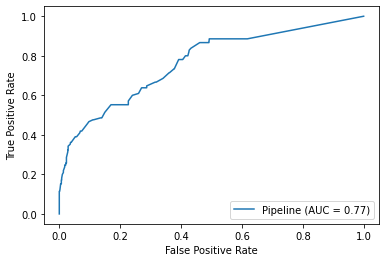

In [10]:
#ROC CURVE
loan_lr = plot_roc_curve(model_loan,X_val_loan,y_val_loan)


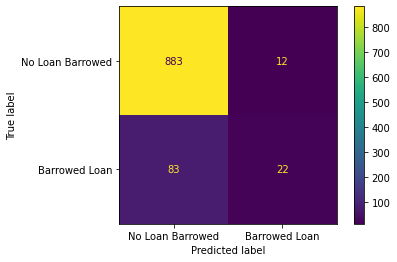

In [19]:
plot_confusion_matrix(model_loan, X_val_loan,y_val_loan, values_format = '.0f', display_labels=['No Loan Barrowed','Barrowed Loan']);

In [62]:
# Precission Score
# Predicted whether someone borrowed a loan but didnt
print('Precision Score:',22/(22+12))

Precision Score: 0.6470588235294118


In [66]:
# Recall Score
# Percent of how many people actually borrowed a loan
print('Recall Score;',22/(22+83))

Recall Score; 0.20952380952380953


# **Decision Tree Model**

In [21]:
model_dt_loan = make_pipeline(OrdinalEncoder(),
                        SimpleImputer(strategy='mean'),
                        DecisionTreeClassifier(random_state=42))
model_dt_loan.fit(X_train_loan,y_train_loan);

In [22]:
#checking my model accuracy
print('Training Accuracy:', model_dt_loan.score(X_train_loan, y_train_loan) )
print('Validation Accuracy:', model_dt_loan.score(X_val_loan, y_val_loan) )

Training Accuracy: 0.948
Validation Accuracy: 0.904


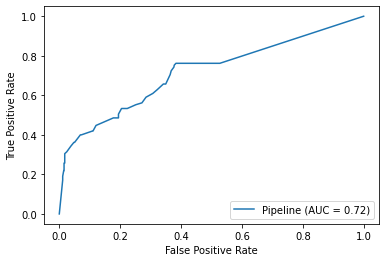

In [23]:
#ROC CURVE
loan_lr = plot_roc_curve(model_dt_loan,X_val_loan,y_val_loan)

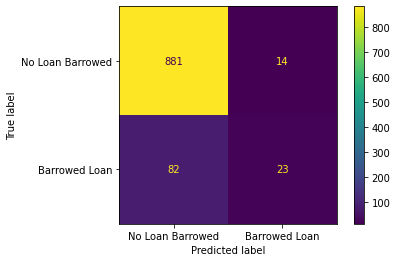

In [24]:
plot_confusion_matrix(model_dt_loan, X_val_loan,y_val_loan, values_format = '.0f', display_labels=['No Loan Barrowed','Barrowed Loan']);

In [81]:
#Precission Score
#predicted whether someone borrowed a loan but didnt
print('Precision Score:',23/(23+14))

Precision Score: 0.6216216216216216


In [82]:
#Recall Score
#Percent of how many people actually borrowed a loan
print('Recall Score;',23/(23+82))

Recall Score; 0.21904761904761905


# **Logistic regression Model**

In [25]:
model_lr_loan = make_pipeline(SimpleImputer(),
                         StandardScaler(),
                         LogisticRegression())
model_lr_loan.fit(X_train_loan,y_train_loan);

In [83]:
#checking my model accuracy
print('Training Accuracy:', model_lr_loan.score(X_train_loan, y_train_loan))
print('Validation Accuracy:', model_lr_loan.score(X_val_loan, y_val_loan) )

Training Accuracy: 0.91625
Validation Accuracy: 0.906


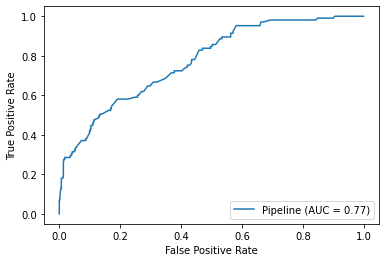

In [76]:
#ROC CURVE
loan_lr = plot_roc_curve(model_lr_loan,X_val_loan,y_val_loan)


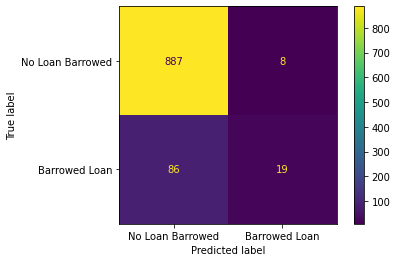

In [26]:
plot_confusion_matrix(model_lr_loan, X_val_loan,y_val_loan, values_format = '.0f', display_labels=['No Loan Barrowed','Barrowed Loan']);

In [63]:
#Precission Score
#predicted whether someone borrowed a loan but didnt
print('Precision Score:',19/(19+8))

Precision Score: 0.7037037037037037


In [67]:
#Recall Score
#Percent of how many people actually borrowed a loan
print('Recall Score;',19/(19+86))

Recall Score; 0.18095238095238095


# **Gradient boosted model**

In [27]:
model_gb_loan = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(strategy='mean'),
                         GradientBoostingClassifier(random_state = 42, n_estimators=75, learning_rate = 0.6))
model_gb_loan.fit(X_train_loan,y_train_loan);

In [54]:
print('Training Accuracy', model_gb_loan.score(X_train_loan, y_train_loan))
print('Validation Accuracy', model_gb_loan.score(X_val_loan, y_val_loan))

Training Accuracy 0.94275
Validation Accuracy 0.908


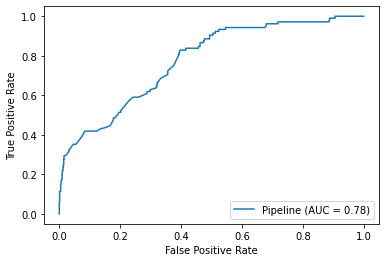

In [78]:
#ROC CURVE
loan_lr = plot_roc_curve(model_gb_loan,X_val_loan,y_val_loan)

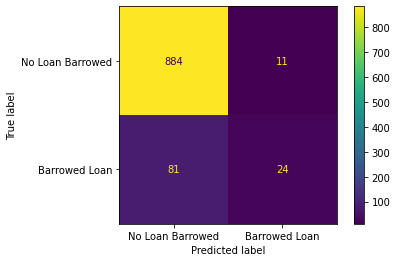

In [28]:
plot_confusion_matrix(model_gb_loan, X_val_loan,y_val_loan, values_format = '.0f', display_labels=['No Loan Barrowed','Barrowed Loan']);

In [64]:
#Precission Score
#predicted whether someone borrowed a loan but didnt
print('Precision Score:',24/(24+11))

Precision Score: 0.6857142857142857


In [68]:
#Recall Score
#Percent of how many people actually borrowed a loan
print('Recall Score;',24/(24+81))

Recall Score; 0.22857142857142856


# **XGBoost model**

In [29]:
model_xgb_loan = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(strategy='mean'),
                         XGBClassifier(random_state = 42, n_estimators=75, n_jobs = -1, learning_rate = 0.2))
model_xgb_loan.fit(X_train_loan,y_train_loan);

In [17]:
print('Training Accuracy', model_xgb_loan.score(X_train_loan, y_train_loan))
print('Validation Accuracy', model_xgb_loan.score(X_val_loan, y_val_loan))

Training Accuracy 0.929
Validation Accuracy 0.917


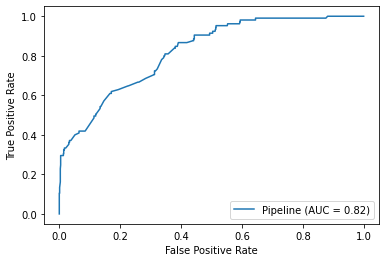

In [79]:
#ROC CURVE
loan_lr = plot_roc_curve(model_xgb_loan,X_val_loan,y_val_loan)

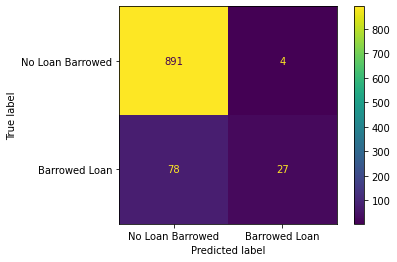

In [30]:
plot_confusion_matrix(model_xgb_loan, X_val_loan,y_val_loan, values_format = '.0f', display_labels=['No Loan Barrowed','Barrowed Loan']);

In [65]:
#Precission Score
#predicted whether someone borrowed a loan but didnt
print('Precision Score:',27/(27+4))

Precision Score: 0.8709677419354839


In [69]:
#Recall Score
#Percent of how many people actually borrowed a loan
print('Recall Score;',27/(27+78))

Recall Score; 0.2571428571428571


# **Confusion Matrix**

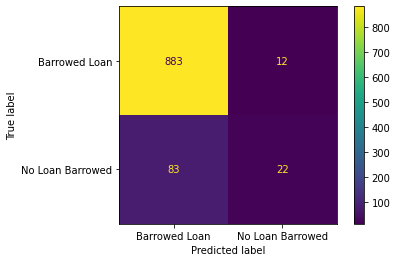

In [57]:
#model loan
plot_confusion_matrix(model_loan, X_val_loan,y_val_loan, values_format = '.0f', display_labels=['Barrowed Loan','No Loan Barrowed']);

In [101]:
#Precission Score
#predicted whether someone borrowed a loan but didnt
print('Precision Score:',22/(22+12))

Precision Score: 0.6470588235294118


In [172]:
#Recall Score
#Percent of how many people actually borrowed a loan
print('Recall Score;',22/(22+83))

Recall Score; 0.20952380952380953


In [173]:
#Classifiation report
print(classification_report(y_val_loan, model_loan.predict(X_val_loan), target_names=['Barrowed Loan','No Loan Barrowed']))

                  precision    recall  f1-score   support

   Barrowed Loan       0.91      0.99      0.95       895
No Loan Barrowed       0.65      0.21      0.32       105

        accuracy                           0.91      1000
       macro avg       0.78      0.60      0.63      1000
    weighted avg       0.89      0.91      0.88      1000



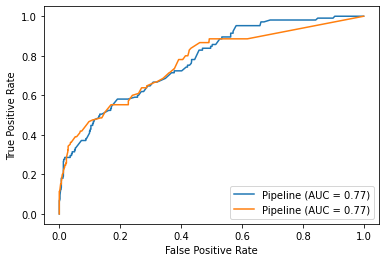

In [176]:
#ROC CURVE
loan_lr = plot_roc_curve(model_lr_loan,X_val_loan,y_val_loan)
loan_rf = plot_roc_curve(model_loan,X_val_loan,y_val_loan,ax=loan_lr.ax_)

# **Plot all models into ROC**

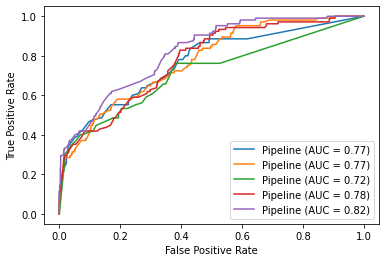

In [99]:
#Combined all into one plot to see the difference
classifiers = [model_loan,model_lr_loan,model_dt_loan, model_gb_loan, model_xgb_loan]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_val_loan, y_val_loan, ax=ax)

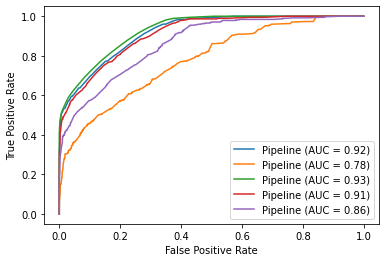

In [100]:
#Combined all into one plot to see the difference
classifiers = [model_loan,model_lr_loan,model_dt_loan, model_gb_loan, model_xgb_loan]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_train_loan, y_train_loan, ax=ax)

# **Tree Model**

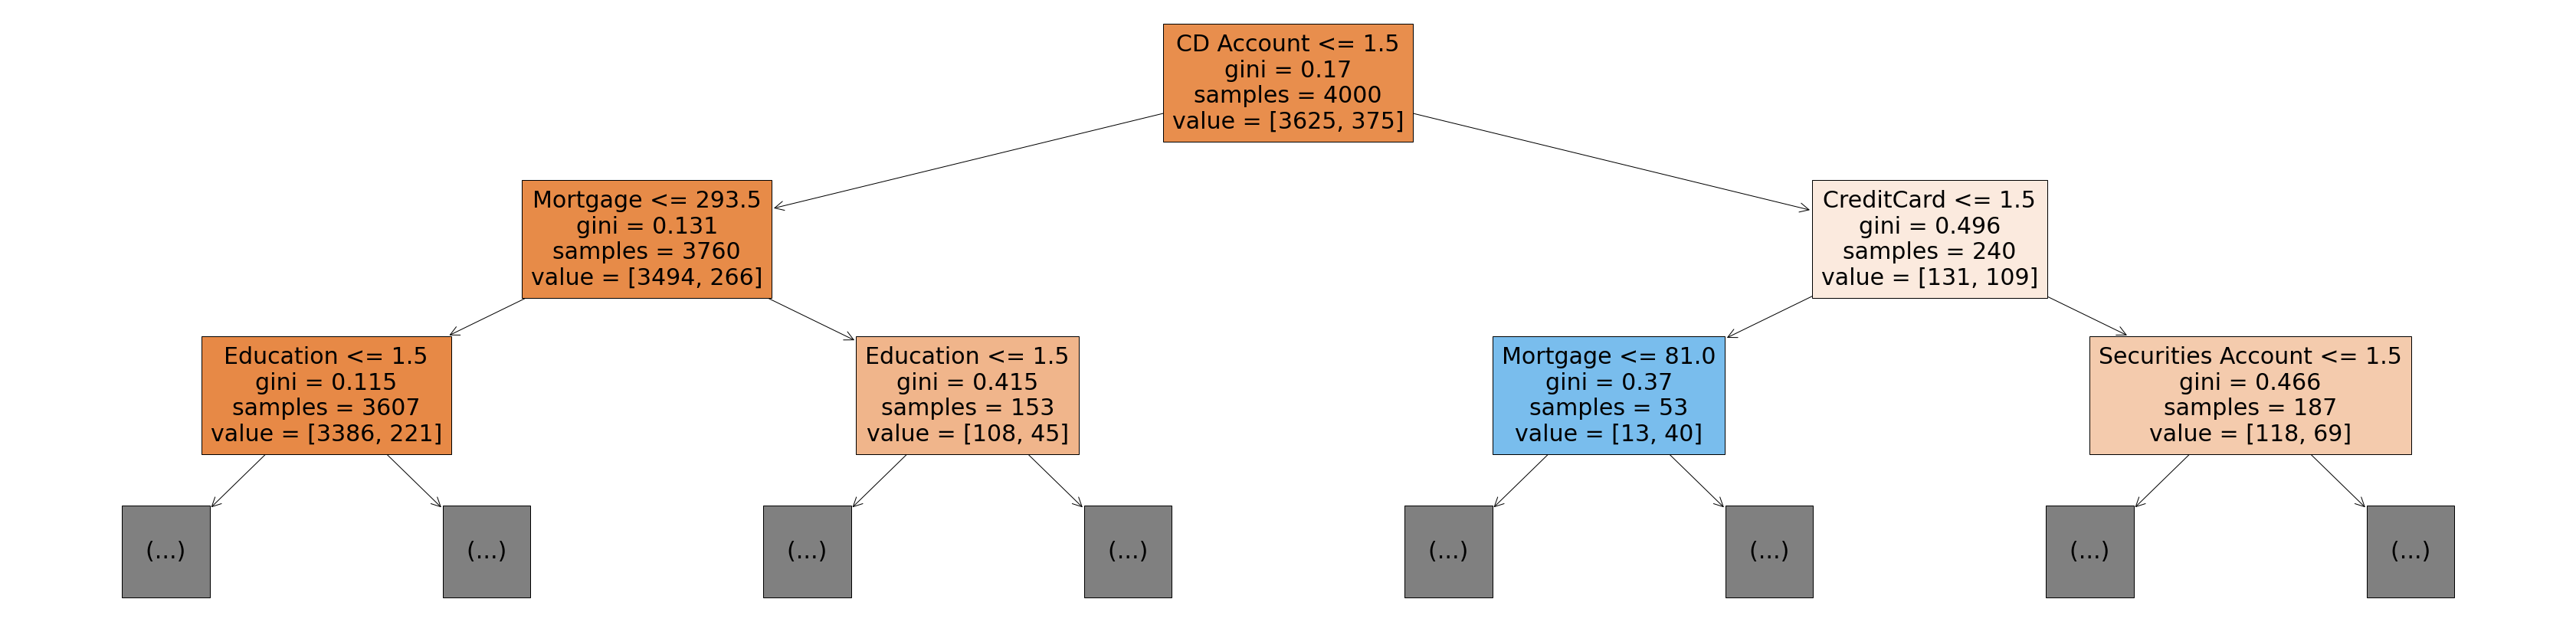

In [107]:
plt.figure(figsize=(60,15))
plot_tree(model_dt_loan.named_steps['decisiontreeclassifier'],
          max_depth=2,
          feature_names=X_train_loan.columns,
          filled=True);

# **Create a Pie Chart fot DataSet**

In [128]:
df_loan

,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4,1,0,0,1,0,0,0
1,3,1,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0
4,4,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4995,1,3,0,0,0,0,1,0
4996,4,1,85,0,0,0,1,0
4997,2,3,0,0,0,0,0,0
4998,3,2,0,0,0,0,1,0


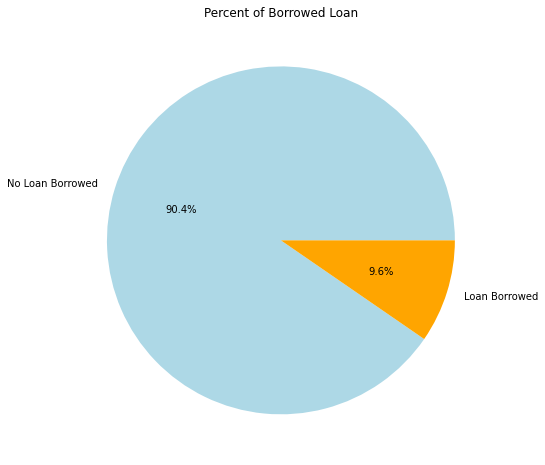

In [16]:
plt.figure(figsize=(25,8))
plt.subplot(121)
plt.title('Percent of Borrowed Loan')
plt.pie(data=df_loan, x=df_loan['Personal Loan'].value_counts(), autopct='%1.1f%%', 
        labels=['No Loan Borrowed', 'Loan Borrowed'], colors=['lightblue','orange']);

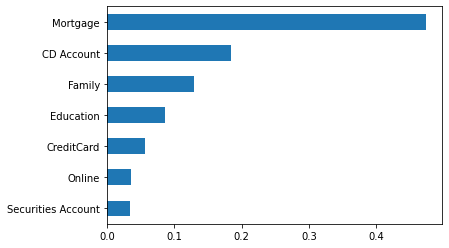

In [35]:
#checking for data leakage
importances = model_loan.named_steps['randomforestclassifier'].feature_importances_
features = X_train_loan.columns
pd.Series(importances,index=features).sort_values().tail(10).plot(kind='barh');